<a href="https://www.kaggle.com/code/risakashiwabara/eda-sklearn-heatmap?scriptVersionId=152734297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import sys
sys.path.append('../input/iterativestratification')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from tqdm.auto import tqdm
import catboost as cb


from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
cust_color = [
    '#EDC7B7',
    '#EEE2DC',
    '#BAB2B5',
    '#123C69',
    '#AC3B61'
]
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.grid"] = False
plt.rcParams["grid.color"] = cust_color[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["font.family"] = "monospace"

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 0.5



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()
num_cols = train.columns.tolist()[1:-1]
cat_cols = 'EJ'
num_cols.remove(cat_cols)
train_EJ =pd.get_dummies(train[['EJ']])
train = pd.concat([train,train_EJ],axis=1)
train = train.drop(['EJ'], axis=1)
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,1,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,0,1
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,0,1
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0,1,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0,0,1
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0,1,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0,0,1


## Data_

### data1(describe)

In [3]:
num_features = train.columns[1:-2]
train[num_features].describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


### dara2(greeks_count)

In [4]:
list_df =greeks[['Alpha','Beta','Delta']]
list_df 

,Alpha,Beta,Delta
0,B,C,D
1,A,C,B
2,A,C,B
3,A,C,B
4,D,B,B
...,...,...,...
612,A,B,B
613,A,B,B
614,A,C,B
615,A,C,B


In [5]:
res = list_df .assign(count=0).groupby(['Alpha','Beta','Delta'])['count'].count().reset_index()
res['Alpha'] = res['Alpha'].str.cat([res['Beta'],res['Delta']])
res = res.drop(['Beta', 'Delta'], axis=1)
print(res)

   Alpha  count
0    ABA     51
1    ABB     97
2    ACA      1
3    ACB    305
4    ACC     44
5    ACD     11
6    BAA      2
7    BBA     10
8    BBB     20
9    BCB      4
10   BCC     14
11   BCD     11
12   DAA      1
13   DBA      5
14   DBB     10
15   DCC      2
16   GAA      5
17   GBB      9
18   GCB     11
19   GCC      4


# -graph①

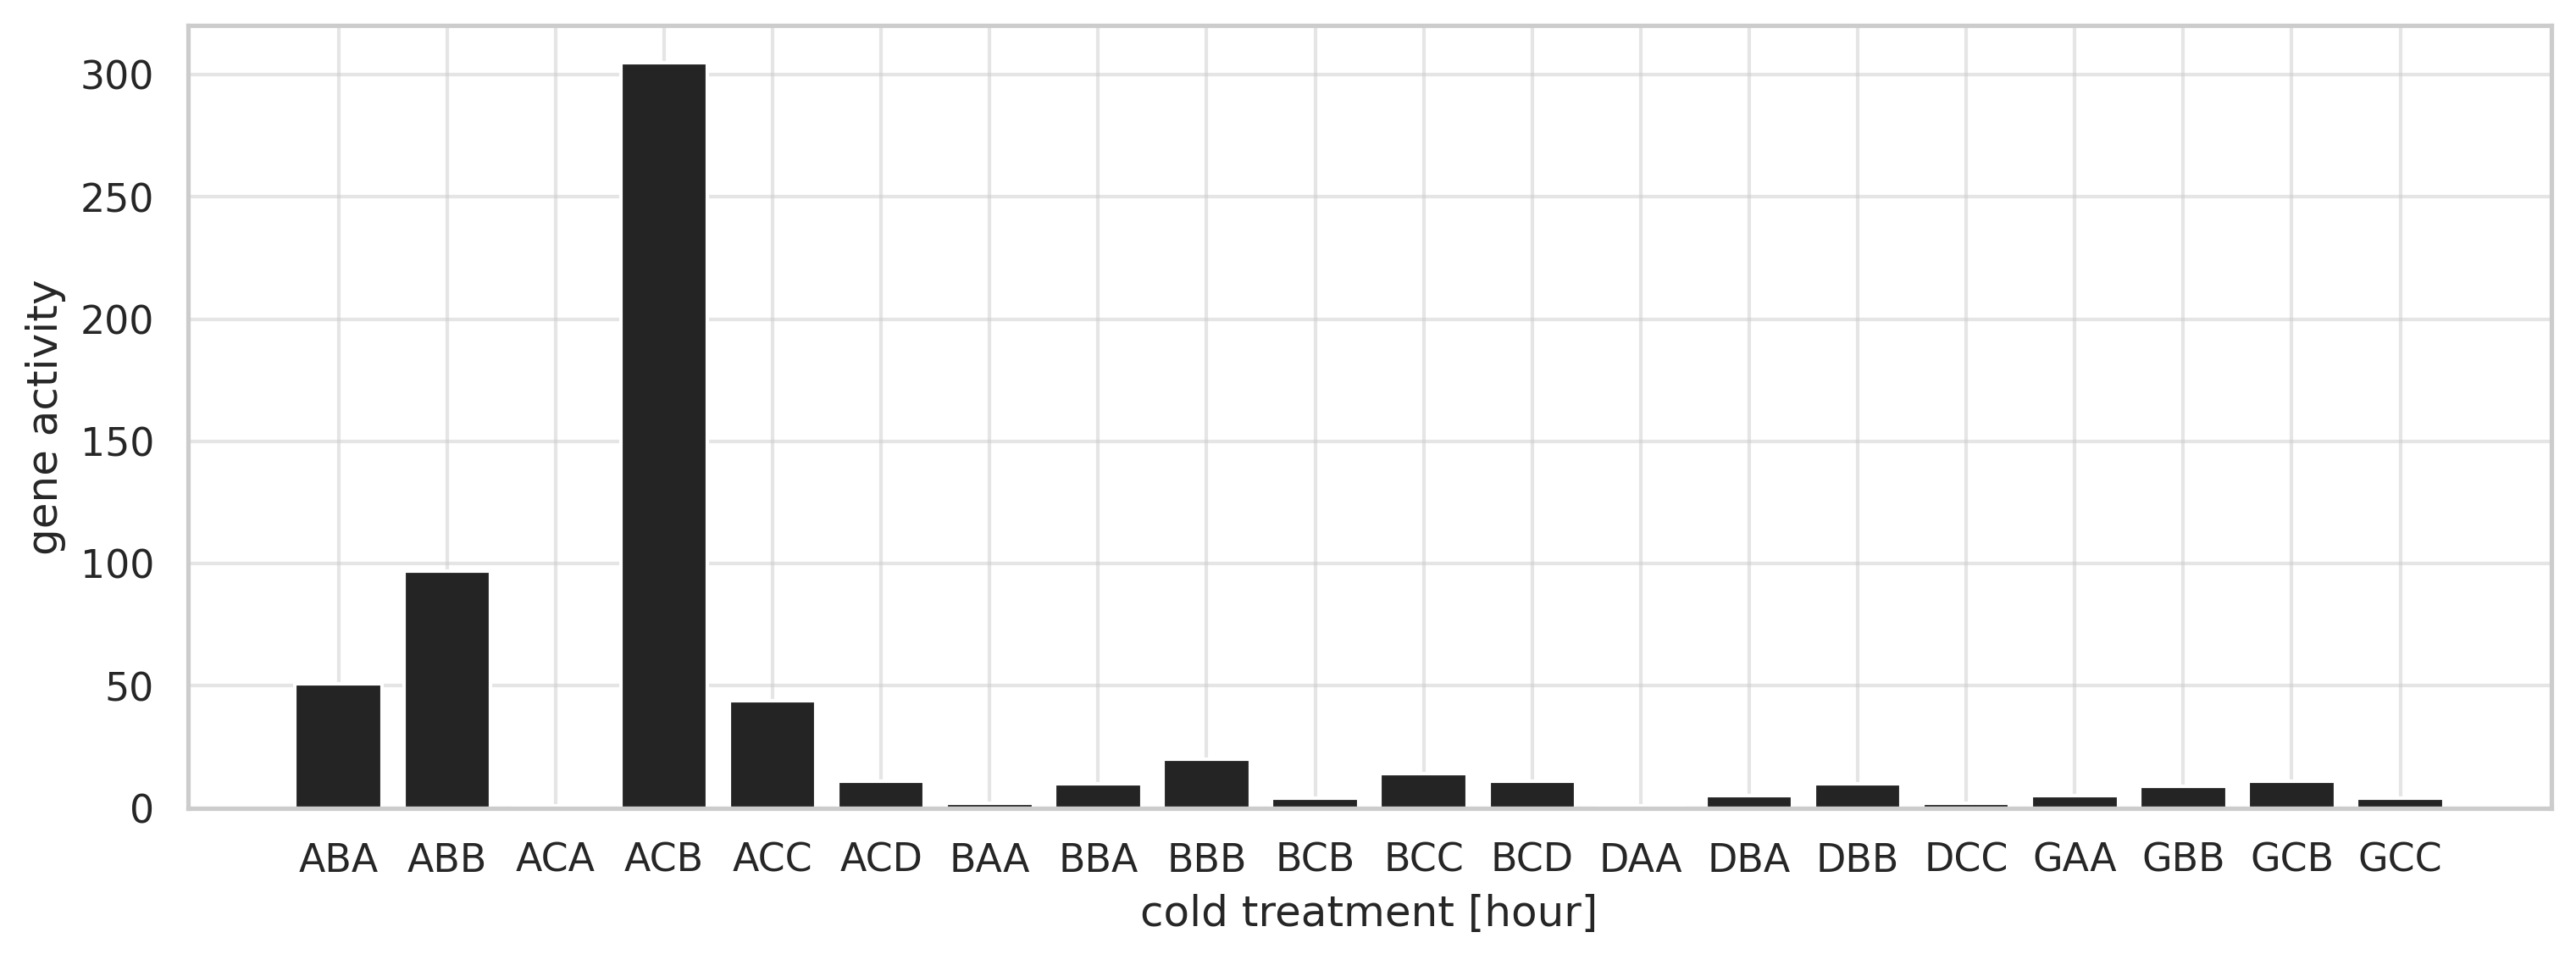

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

x = res['Alpha']
y = res['count']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y)
ax.set_xlabel('cold treatment [hour]')
ax.set_ylabel('gene activity')



plt.show()

# graph➁(heatmap)

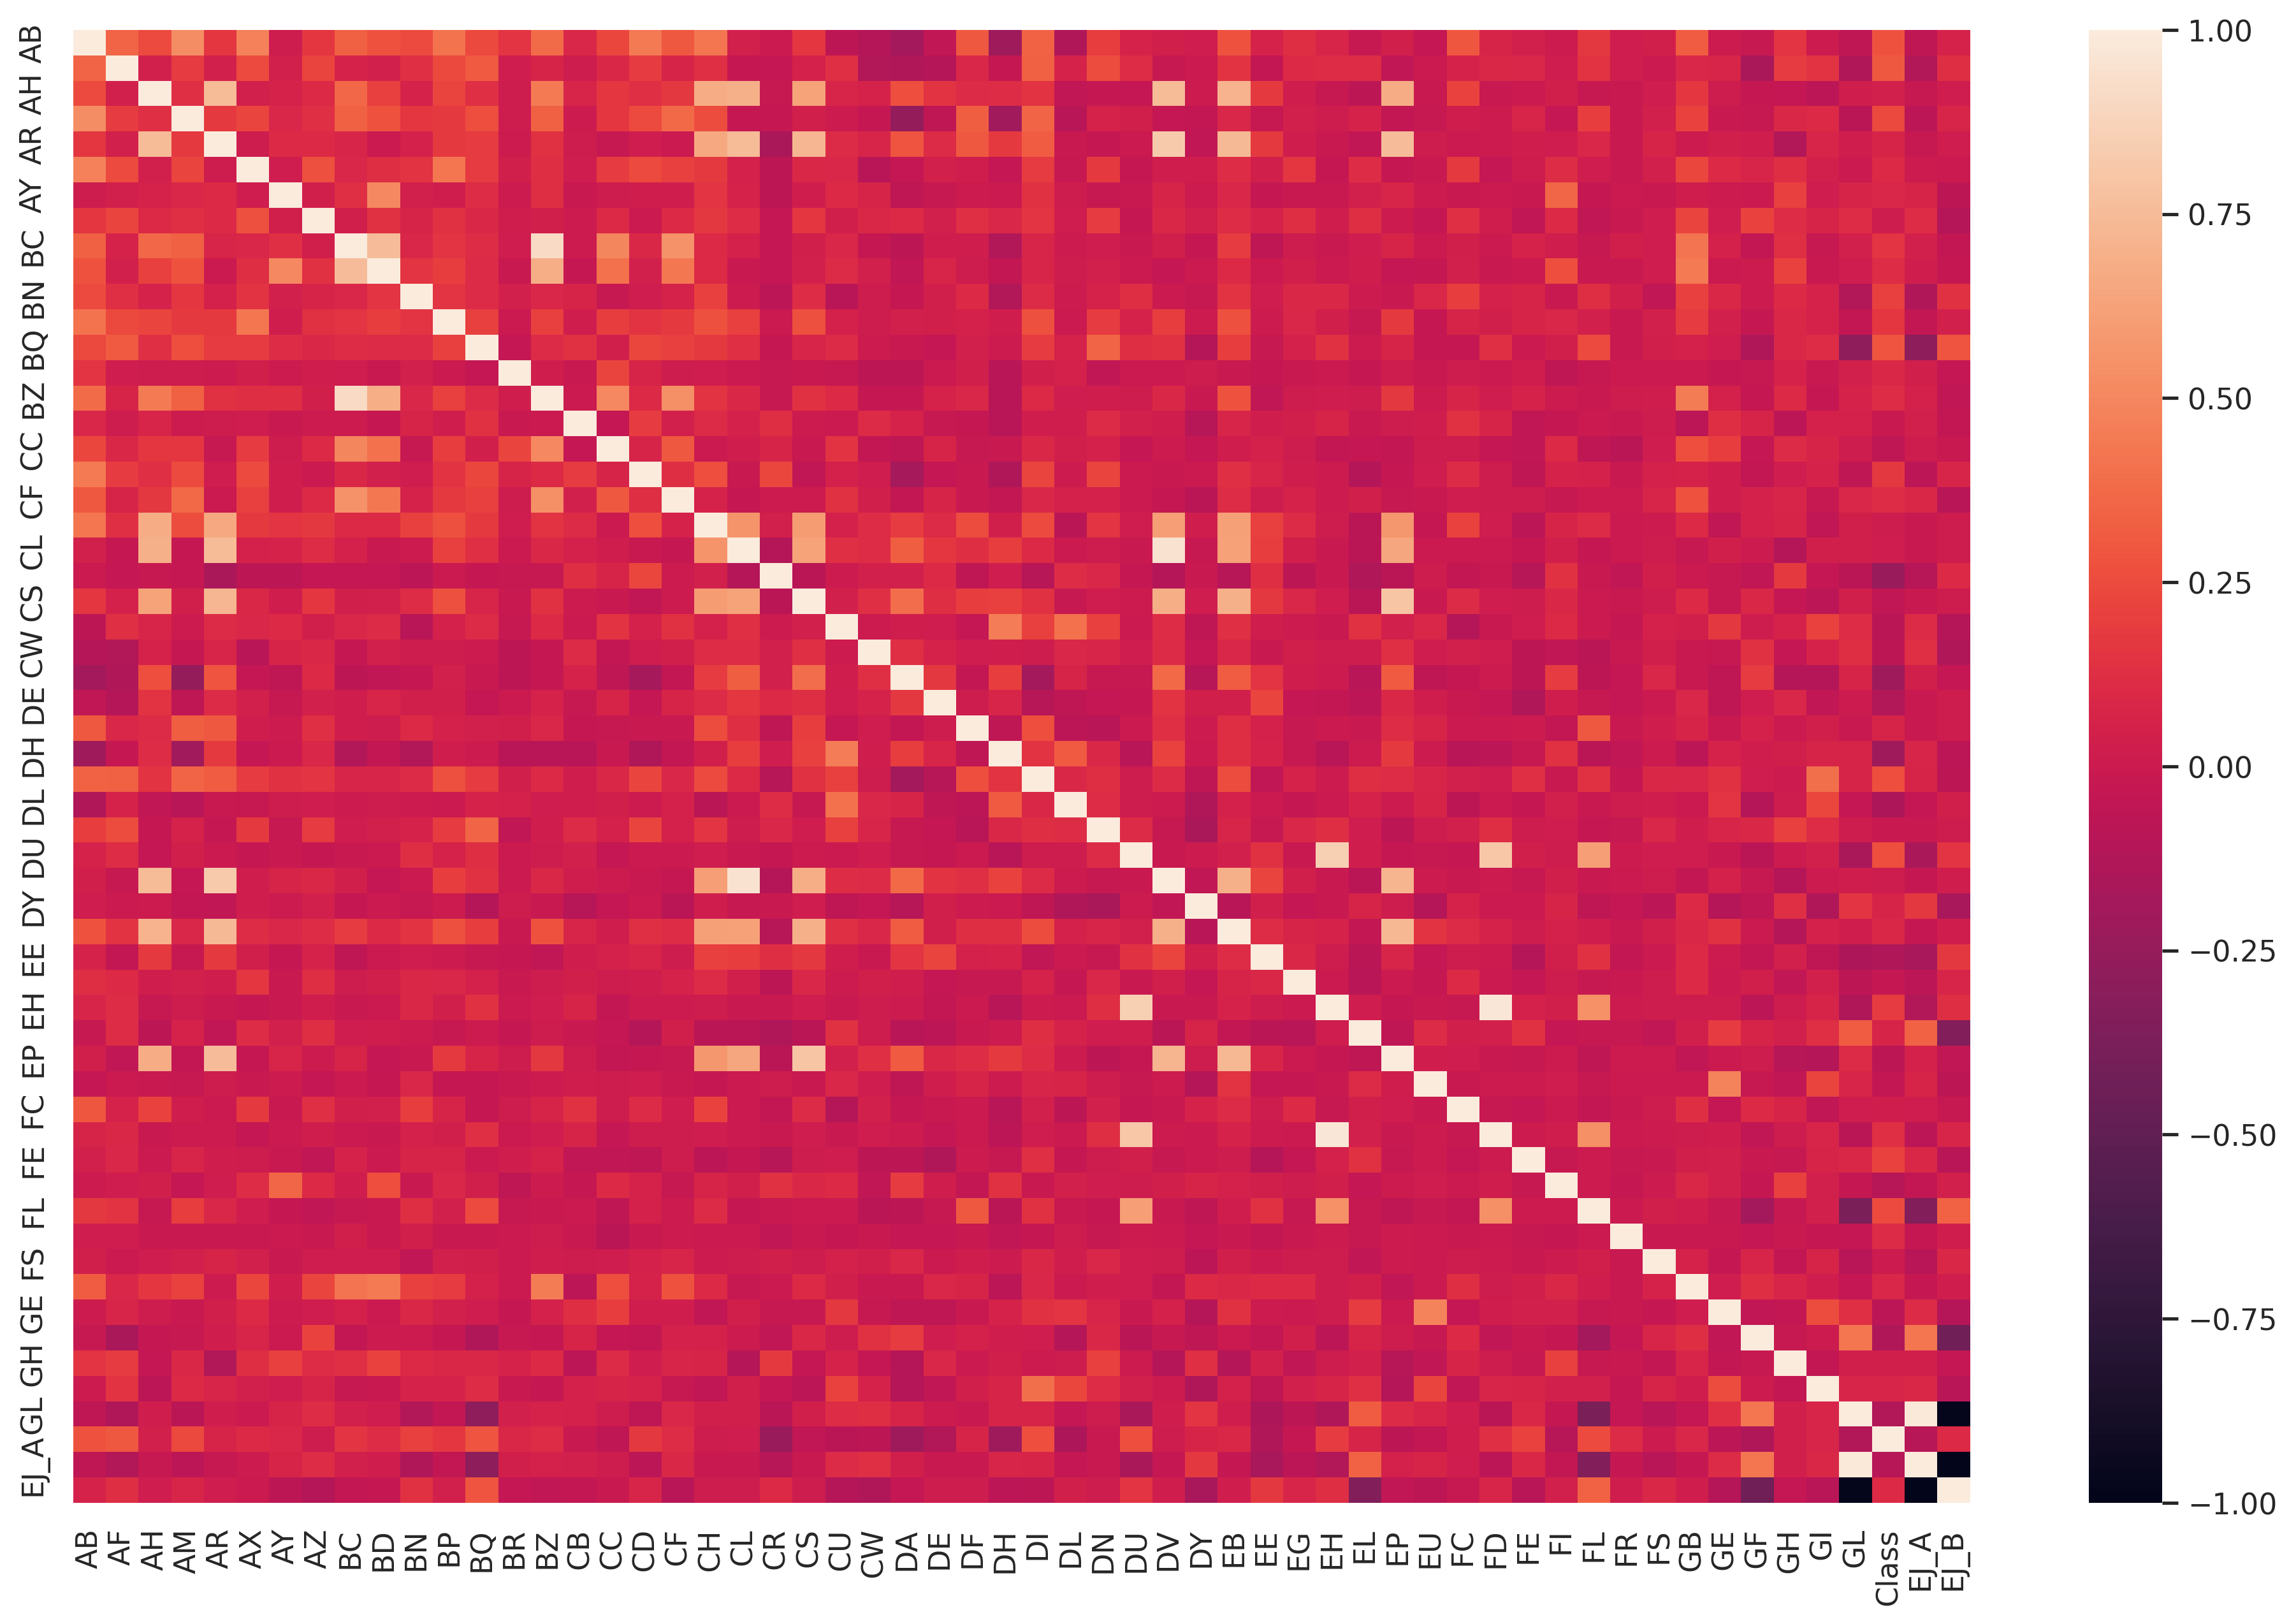

In [7]:
train = train.drop(['Id'], axis=1)
acx = train.copy(deep=True)
yt=acx['Class']
xt=acx.drop(columns=['Class'])

# train_df1.drop(columns=['Id'],inplace=True)
quantile_scaler = preprocessing.QuantileTransformer(n_quantiles=60, output_distribution='uniform')
scaled_train_df = train.copy(deep=True)

for col in num_cols:
    scaled_train_df[col] = quantile_scaler.fit_transform(scaled_train_df[[col]])

scaled_train_df

x = scaled_train_df.drop(columns=['Class'])
y = scaled_train_df['Class']
scaler = StandardScaler()

# keep our unscaled features just in case we need to process them alternatively
features_scaled = xt
X_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = xt
X_minmax = scaler.fit_transform(features_minmax)
plt.figure(figsize=(16,10))
sns.heatmap(acx.corr())
plt.show()